In [1]:
from zipfile import ZipFile
import os

zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['__MACOSX', 'women fashion']


In [2]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['solid dark blue top and a floral pattern on the bottom.jpg',
  'bright red, sequined dress with thin shoulder straps.jpg',
  'sparkling, fitted dress.jpeg',
  'bright red kurta with an intricate patterned design.jpg',
  'Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp',
  'red velvet sheath midi dress.jpg',
  'chic and elegant outfit consisting of a pair of high-waisted wide-leg trousers paired with a long-sleeve sheer lace top.jpg',
  'fluffy, possibly faux fur or eyelash knit sweater with a cropped cut top.jpg',
  'dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg',
  'pink, knee-length dress that sparkles.jpg'],
 97)

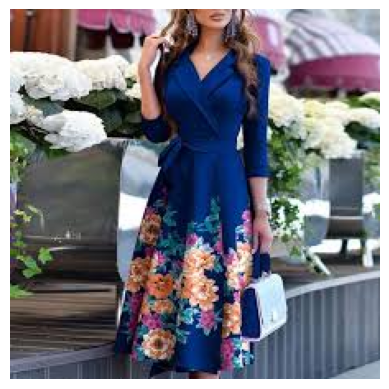

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [4]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/women_fashion/women fashion/solid dark blue top and a floral pattern on the bottom.jpg', '/content/women_fashion/women fashion/bright red, sequined dress with thin shoulder straps.jpg', '/content/women_fashion/women fashion/sparkling, fitted dress.jpeg', '/content/women_fashion/women fashion/bright red kurta with an intricate patterned design.jpg', '/content/women_fashion/women fashion/Sleeveless-Ruched-Tight-Fashion-Sexy-Bodycon-Party-Women-Club-Dresses.webp', '/content/women_fashion/women fashion/red velvet sheath midi dress.jpg', '/content/women_fashion/women fashion/chic and elegant outfit consisting of a pair of high-waisted wide-leg trousers paired with a long-sleeve sheer lace top.jpg', '/content/women_fashion/women fashion/fluffy, possibly faux fur or eyelash knit sweater with a cropped cut top.jpg', '/content/women_fashion/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg', '/content/women_fashion/women fashion/pink, knee-length d

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━

In [7]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


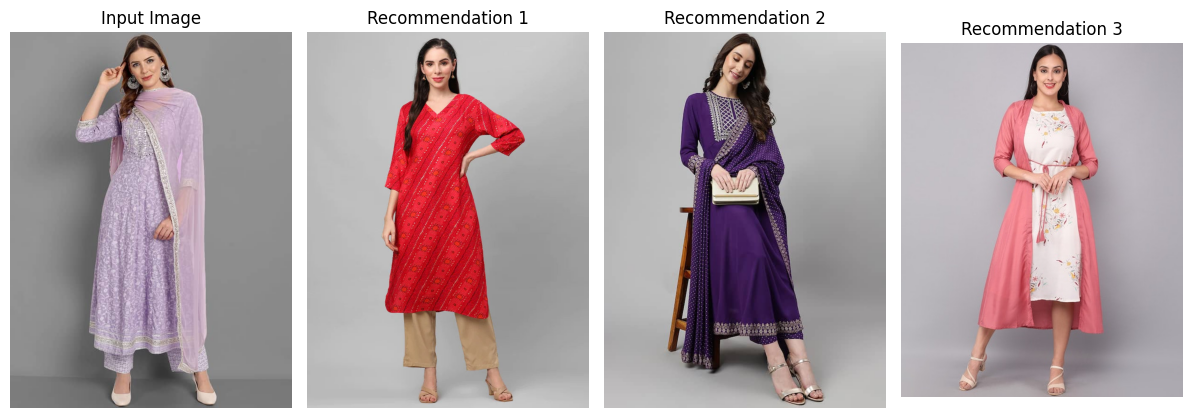

In [9]:
input_image_path = '/content/women_fashion/women fashion/anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)